In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from EI_Calculator_from_Coordinates import EI_from_Scatter

#Design Coupon Shape
coup_width = 10 #in
coup_height = 2 #in
radius = coup_height/2
x0 = -coup_width/2
xend = coup_width/2
quality = 1000
xcenter_neg = x0+radius
xcenter_pos = xend-radius

x = np.linspace(x0,xend,quality)
x = np.append(x,np.flip(x)[1:len(x)])
y = np.zeros(len(x))
indexer = -1
for i in x[0:int(np.round(len(x)/2))+1]:
    indexer+=1
    
    if i <= xcenter_neg:
        y[indexer] = -(radius)*math.sin(np.arccos((i-xcenter_neg)/radius))
    elif (xcenter_neg < i) and (i < xcenter_pos):
        y[indexer] = - radius
    elif i >= xcenter_pos:
        y[indexer] = -(radius)*math.sin(np.arccos((i-xcenter_pos)/radius))


for i in x[int(np.round(len(x)/2))+1 : len(x)]:
    indexer+=1
    if i <= xcenter_neg:
        y[indexer] = (radius)*math.sin(np.arccos((i-xcenter_neg)/radius))
    elif (xcenter_neg < i) and (i < xcenter_pos):
        y[indexer] =  radius
    elif i >= xcenter_pos:
        y[indexer] = (radius)*math.sin(np.arccos((i-xcenter_pos)/radius))


print(y)
plt.scatter(x,y)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

x_coupon = x
y_coupon = y

print('-------------------------------')

EI_from_Scatter(x_coupon, y_coupon, 10)


[-1.22464680e-16 -1.41137591e-01 -1.99096054e-01 ...  1.99096054e-01
  1.41137591e-01  1.22464680e-16]
[-5.         -4.98998999 -4.97997998 ... -4.97997998 -4.98998999
 -5.        ]
-------------------------------


IndexError: tuple index out of range

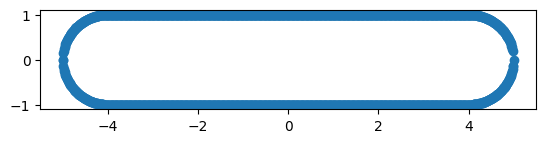

In [3]:
import numpy as np
import math
import matplotlib as plt
import matplotlib.pyplot as plt


def EI_from_Scatter(x,y,E):
    Areas = np.array([])
    for i in range(len(x)):
        coord_x = x[i]
        coord_y = y[i]
        Area = np.array([])
        for j in range(coord_x.shape[0]-2):
            area_element1 = (coord_x[0]*(coord_y[j+1] - coord_y[j+2]))
            area_element2 = (coord_x[j+1]*(coord_y[j+2] - coord_y[0]))
            area_element3 = (coord_x[j+2]*(coord_y[0] - coord_y[j+1]))
            area_element = (1/2)*(area_element1 + area_element2 + area_element3)
            Area = np.append(Area, np.array(area_element))
        Areas = np.append(Areas, np.sum(Area))

    return Areas


#Design Coupon Shape
coup_width = 10 #in
coup_height = 2 #in
radius = coup_height/2
x0 = -coup_width/2
xend = coup_width/2
quality = 1000
xcenter_neg = x0+radius
xcenter_pos = xend-radius

x = np.linspace(x0,xend,quality)
x = np.append(x,np.flip(x)[1:len(x)])
y = np.zeros(len(x))
indexer = -1
for i in x[0:int(np.round(len(x)/2))+1]:
    indexer+=1
    
    if i <= xcenter_neg:
        y[indexer] = -(radius)*math.sin(np.arccos((i-xcenter_neg)/radius))
    elif (xcenter_neg < i) and (i < xcenter_pos):
        y[indexer] = - radius
    elif i >= xcenter_pos:
        y[indexer] = -(radius)*math.sin(np.arccos((i-xcenter_pos)/radius))


for i in x[int(np.round(len(x)/2))+1 : len(x)]:
    indexer+=1
    if i <= xcenter_neg:
        y[indexer] = (radius)*math.sin(np.arccos((i-xcenter_neg)/radius))
    elif (xcenter_neg < i) and (i < xcenter_pos):
        y[indexer] =  radius
    elif i >= xcenter_pos:
        y[indexer] = (radius)*math.sin(np.arccos((i-xcenter_pos)/radius))


print(y)
plt.scatter(x,y)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

x_coupon = x
y_coupon = y

print(x_coupon)

print('-------------------------------')

EI_from_Scatter(x_coupon, y_coupon, 10)

10
10


ValueError: not enough values to unpack (expected 4, got 2)

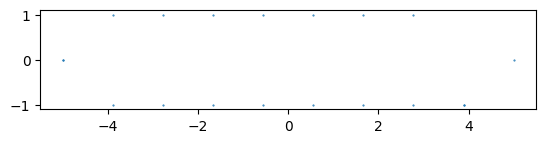

In [14]:
import numpy as np
from Surfboard_Coupon_Coordinate_Generator import coupon_coord_generator
#from EI_Calculator_from_Coordinates import EI_from_Scatter
from EI_Calculator_from_Coordinates import EI_from_Scatter_Thinwalled
import math



x,y = coupon_coord_generator(10,2,10,True)

x_ceil = math.ceil(len(x)/2)
x_floor = math.floor(len(x)/2)

y_ceil = math.ceil(len(y)/2)
y_floor = math.floor(len(y)/2)

x1 = np.array(x[:x_ceil])
x2 = np.array(x[x_floor:])

y1 = np.array(y[:y_ceil])
y2 = np.array(y[y_floor:])
print(x1.shape[0])
print(x2.shape[0])

xcoord = np.array([x1, x2])
ycoord = np.array([y1,y2])

E = [1e8, 1e8]
t = [2.5e-3, 5e-3]


Areas, EIxxs, EIyys, EIxys = EI_from_Scatter_Thinwalled(xcoord, ycoord, E, t)




